In [1]:
#Importação de bibliotecas utilizadas para o estudo, análise e construção deste projeto

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns


In [2]:
# Importação do ficheiro excel (.xlsx) onde são feitos os registos dos pacientes, 
# bem como os dados e informação correspondente aos aos internamentos

df_internamentos = pd.read_excel('internamentos_final.xlsx')
df_internamentos.dtypes

ID_UT                      object
Sexo                       object
Data Nascimento    datetime64[ns]
Conc Residencia            object
Data Inicio        datetime64[ns]
Data Fim           datetime64[ns]
TDI                       float64
TDIFP                     float64
DINP                      float64
ARL_LIM                   float64
DifLimSup                 float64
ARS 100%                  float64
ARS 50%                   float64
Data Diag          datetime64[ns]
Cod_Diag                  float64
Diagnostico                object
Serviço                    object
EFR_Nome                   object
EFR_Cod                   float64
Pat_ARSLVT                 object
DestinoPosAlta             object
dtype: object

In [3]:
df_internamentos

,ID_UT,Sexo,Data Nascimento,Conc Residencia,Data Inicio,Data Fim,TDI,TDIFP,DINP,ARL_LIM,...,ARS 100%,ARS 50%,Data Diag,Cod_Diag,Diagnostico,Serviço,EFR_Nome,EFR_Cod,Pat_ARSLVT,DestinoPosAlta
0,48514,F,1952-01-28,SINTRA,2016-01-21,2016-05-05,105.0,105.0,105.0,65.0,...,65.0,40.0,2015-11-10,80621.0,Fractura coluna vertebral c/ lesao espinal med...,Serv Reab Adultos 1-SRA1,ARSLVT-ACORDO,400140.0,Lesão Medular (traumática),Domicílio
1,48514,F,1952-01-28,SINTRA,2017-06-08,2017-08-02,55.0,55.0,55.0,65.0,...,55.0,0.0,2017-05-29,80621.0,Fractura coluna vertebral c/ lesao espinal med...,Serv Reab Adultos 1-SRA1,ARSLVT-ACORDO,400140.0,Lesão Medular (traumática),Domicílio
2,27620,F,1945-11-03,CASCAIS,2017-03-16,2017-05-17,62.0,62.0,62.0,65.0,...,62.0,0.0,2017-02-14,3360.0,Seringomielia ou seringobulbia,Serv Reab Adultos 1-SRA1,ARSLVT-ACORDO,400140.0,Lesão Medular (traumática),Domicílio
3,9495,F,1961-03-16,CASCAIS,2016-04-21,2016-06-08,48.0,48.0,48.0,49.0,...,48.0,0.0,2016-03-01,75613.0,Agenesia vertebra,Serv Reab Adultos 1-SRA1,ARSLVT-ACORDO,400140.0,Status Pós Fract M Inf ou Cirurg Ortop,Domicílio
4,9495,F,1961-03-16,CASCAIS,2022-12-30,NaT,17.0,2.0,2.0,65.0,...,2.0,0.0,2022-10-04,75613.0,Agenesia vertebra,Serv Reab Adultos 1-SRA1,ARSLVT-ACORDO,400140.0,Lesão Medular (não traumática),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5704,98150,M,1989-05-05,SETÚBAL,2022-12-15,NaT,32.0,17.0,17.0,60.0,...,17.0,0.0,2022-12-05,2379.0,Tumor de comportam incerto OL ou LNE do SN,Serv Reab Adultos 1-SRA1,ARSLVT-ACORDO,400140.0,Lesão Encefálica (não traumática),NaN
5705,98168,F,1998-08-07,ODIVELAS,2022-12-09,NaT,38.0,23.0,23.0,70.0,...,23.0,0.0,2022-12-06,3570.0,Polineuropatia infecciosa aguda (sind Guillan-...,Serv Reab Adultos 1-SRA1,ARSLVT-ACORDO,400140.0,Síndrome de Guillain-Barré,NaN
5706,98170,M,1988-05-26,OEIRAS,2022-12-16,NaT,31.0,16.0,16.0,NaN,...,NaN,NaN,2022-12-06,80621.0,Fractura coluna vertebral c/ lesao espinal med...,Serv Reab Adultos 1-SRA1,"FIDELIDADE,COMPANHIA DE SEGUROS S.A",61027.0,NaN,NaN
5707,98188,M,1971-07-29,ALENQUER,2022-12-28,NaT,19.0,4.0,4.0,64.0,...,4.0,0.0,2022-12-05,438.0,Seq de D cerebrovascular,Serv Reab Adultos 3-SRA3,ARSLVT-ACORDO,400140.0,Acidente Vascular Cerebral (AVC),NaN


# Processamento e tratamento dos dados

In [4]:
# Retira a última linha (totais) do dataframe df_internamentos. Este informação não é relevante para o contexto do problema
# da forma como se encontra.

df_internamentos.drop(df_internamentos.tail(1).index, inplace=True)
df_internamentos

,ID_UT,Sexo,Data Nascimento,Conc Residencia,Data Inicio,Data Fim,TDI,TDIFP,DINP,ARL_LIM,...,ARS 100%,ARS 50%,Data Diag,Cod_Diag,Diagnostico,Serviço,EFR_Nome,EFR_Cod,Pat_ARSLVT,DestinoPosAlta
0,48514,F,1952-01-28,SINTRA,2016-01-21,2016-05-05,105.0,105.0,105.0,65.0,...,65.0,40.0,2015-11-10,80621.0,Fractura coluna vertebral c/ lesao espinal med...,Serv Reab Adultos 1-SRA1,ARSLVT-ACORDO,400140.0,Lesão Medular (traumática),Domicílio
1,48514,F,1952-01-28,SINTRA,2017-06-08,2017-08-02,55.0,55.0,55.0,65.0,...,55.0,0.0,2017-05-29,80621.0,Fractura coluna vertebral c/ lesao espinal med...,Serv Reab Adultos 1-SRA1,ARSLVT-ACORDO,400140.0,Lesão Medular (traumática),Domicílio
2,27620,F,1945-11-03,CASCAIS,2017-03-16,2017-05-17,62.0,62.0,62.0,65.0,...,62.0,0.0,2017-02-14,3360.0,Seringomielia ou seringobulbia,Serv Reab Adultos 1-SRA1,ARSLVT-ACORDO,400140.0,Lesão Medular (traumática),Domicílio
3,9495,F,1961-03-16,CASCAIS,2016-04-21,2016-06-08,48.0,48.0,48.0,49.0,...,48.0,0.0,2016-03-01,75613.0,Agenesia vertebra,Serv Reab Adultos 1-SRA1,ARSLVT-ACORDO,400140.0,Status Pós Fract M Inf ou Cirurg Ortop,Domicílio
4,9495,F,1961-03-16,CASCAIS,2022-12-30,NaT,17.0,2.0,2.0,65.0,...,2.0,0.0,2022-10-04,75613.0,Agenesia vertebra,Serv Reab Adultos 1-SRA1,ARSLVT-ACORDO,400140.0,Lesão Medular (não traumática),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5703,98126,F,1980-12-25,SANTARÉM,2022-12-15,NaT,32.0,17.0,17.0,49.0,...,17.0,0.0,2022-11-28,3550.0,Mononevrite do MI - nervo ciatico,Serv Reab Adultos 3-SRA3,ARSLVT-ACORDO,400140.0,Status Pós Fract M Inf ou Cirurg Ortop,NaN
5704,98150,M,1989-05-05,SETÚBAL,2022-12-15,NaT,32.0,17.0,17.0,60.0,...,17.0,0.0,2022-12-05,2379.0,Tumor de comportam incerto OL ou LNE do SN,Serv Reab Adultos 1-SRA1,ARSLVT-ACORDO,400140.0,Lesão Encefálica (não traumática),NaN
5705,98168,F,1998-08-07,ODIVELAS,2022-12-09,NaT,38.0,23.0,23.0,70.0,...,23.0,0.0,2022-12-06,3570.0,Polineuropatia infecciosa aguda (sind Guillan-...,Serv Reab Adultos 1-SRA1,ARSLVT-ACORDO,400140.0,Síndrome de Guillain-Barré,NaN
5706,98170,M,1988-05-26,OEIRAS,2022-12-16,NaT,31.0,16.0,16.0,NaN,...,NaN,NaN,2022-12-06,80621.0,Fractura coluna vertebral c/ lesao espinal med...,Serv Reab Adultos 1-SRA1,"FIDELIDADE,COMPANHIA DE SEGUROS S.A",61027.0,NaN,NaN


In [5]:
df_internamentos

,ID_UT,Sexo,Data Nascimento,Conc Residencia,Data Inicio,Data Fim,TDI,TDIFP,DINP,ARL_LIM,...,ARS 100%,ARS 50%,Data Diag,Cod_Diag,Diagnostico,Serviço,EFR_Nome,EFR_Cod,Pat_ARSLVT,DestinoPosAlta
0,48514,F,1952-01-28,SINTRA,2016-01-21,2016-05-05,105.0,105.0,105.0,65.0,...,65.0,40.0,2015-11-10,80621.0,Fractura coluna vertebral c/ lesao espinal med...,Serv Reab Adultos 1-SRA1,ARSLVT-ACORDO,400140.0,Lesão Medular (traumática),Domicílio
1,48514,F,1952-01-28,SINTRA,2017-06-08,2017-08-02,55.0,55.0,55.0,65.0,...,55.0,0.0,2017-05-29,80621.0,Fractura coluna vertebral c/ lesao espinal med...,Serv Reab Adultos 1-SRA1,ARSLVT-ACORDO,400140.0,Lesão Medular (traumática),Domicílio
2,27620,F,1945-11-03,CASCAIS,2017-03-16,2017-05-17,62.0,62.0,62.0,65.0,...,62.0,0.0,2017-02-14,3360.0,Seringomielia ou seringobulbia,Serv Reab Adultos 1-SRA1,ARSLVT-ACORDO,400140.0,Lesão Medular (traumática),Domicílio
3,9495,F,1961-03-16,CASCAIS,2016-04-21,2016-06-08,48.0,48.0,48.0,49.0,...,48.0,0.0,2016-03-01,75613.0,Agenesia vertebra,Serv Reab Adultos 1-SRA1,ARSLVT-ACORDO,400140.0,Status Pós Fract M Inf ou Cirurg Ortop,Domicílio
4,9495,F,1961-03-16,CASCAIS,2022-12-30,NaT,17.0,2.0,2.0,65.0,...,2.0,0.0,2022-10-04,75613.0,Agenesia vertebra,Serv Reab Adultos 1-SRA1,ARSLVT-ACORDO,400140.0,Lesão Medular (não traumática),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5703,98126,F,1980-12-25,SANTARÉM,2022-12-15,NaT,32.0,17.0,17.0,49.0,...,17.0,0.0,2022-11-28,3550.0,Mononevrite do MI - nervo ciatico,Serv Reab Adultos 3-SRA3,ARSLVT-ACORDO,400140.0,Status Pós Fract M Inf ou Cirurg Ortop,NaN
5704,98150,M,1989-05-05,SETÚBAL,2022-12-15,NaT,32.0,17.0,17.0,60.0,...,17.0,0.0,2022-12-05,2379.0,Tumor de comportam incerto OL ou LNE do SN,Serv Reab Adultos 1-SRA1,ARSLVT-ACORDO,400140.0,Lesão Encefálica (não traumática),NaN
5705,98168,F,1998-08-07,ODIVELAS,2022-12-09,NaT,38.0,23.0,23.0,70.0,...,23.0,0.0,2022-12-06,3570.0,Polineuropatia infecciosa aguda (sind Guillan-...,Serv Reab Adultos 1-SRA1,ARSLVT-ACORDO,400140.0,Síndrome de Guillain-Barré,NaN
5706,98170,M,1988-05-26,OEIRAS,2022-12-16,NaT,31.0,16.0,16.0,NaN,...,NaN,NaN,2022-12-06,80621.0,Fractura coluna vertebral c/ lesao espinal med...,Serv Reab Adultos 1-SRA1,"FIDELIDADE,COMPANHIA DE SEGUROS S.A",61027.0,NaN,NaN


In [6]:
# Contagem do número de "Missing Values" em cada coluna

df_internamentos.isna().sum()

ID_UT                0
Sexo                 0
Data Nascimento      0
Conc Residencia      1
Data Inicio          0
Data Fim            96
TDI                  0
TDIFP                0
DINP                 0
ARL_LIM            908
DifLimSup          908
ARS 100%           908
ARS 50%            908
Data Diag            0
Cod_Diag           352
Diagnostico        352
Serviço              0
EFR_Nome             0
EFR_Cod              0
Pat_ARSLVT         908
DestinoPosAlta     115
dtype: int64

In [7]:
# Eliminação das colunas que não se enquadram no contexto do problema, sendo estas:
# + ARL_LIM
# + DifLimSup
# + ARS 100%
# + ARS 50%

df_internamentos = df_internamentos.drop(["ARL_LIM", "DifLimSup", "ARS 100%", "ARS 50%"], axis=1)
df_internamentos

,ID_UT,Sexo,Data Nascimento,Conc Residencia,Data Inicio,Data Fim,TDI,TDIFP,DINP,Data Diag,Cod_Diag,Diagnostico,Serviço,EFR_Nome,EFR_Cod,Pat_ARSLVT,DestinoPosAlta
0,48514,F,1952-01-28,SINTRA,2016-01-21,2016-05-05,105.0,105.0,105.0,2015-11-10,80621.0,Fractura coluna vertebral c/ lesao espinal med...,Serv Reab Adultos 1-SRA1,ARSLVT-ACORDO,400140.0,Lesão Medular (traumática),Domicílio
1,48514,F,1952-01-28,SINTRA,2017-06-08,2017-08-02,55.0,55.0,55.0,2017-05-29,80621.0,Fractura coluna vertebral c/ lesao espinal med...,Serv Reab Adultos 1-SRA1,ARSLVT-ACORDO,400140.0,Lesão Medular (traumática),Domicílio
2,27620,F,1945-11-03,CASCAIS,2017-03-16,2017-05-17,62.0,62.0,62.0,2017-02-14,3360.0,Seringomielia ou seringobulbia,Serv Reab Adultos 1-SRA1,ARSLVT-ACORDO,400140.0,Lesão Medular (traumática),Domicílio
3,9495,F,1961-03-16,CASCAIS,2016-04-21,2016-06-08,48.0,48.0,48.0,2016-03-01,75613.0,Agenesia vertebra,Serv Reab Adultos 1-SRA1,ARSLVT-ACORDO,400140.0,Status Pós Fract M Inf ou Cirurg Ortop,Domicílio
4,9495,F,1961-03-16,CASCAIS,2022-12-30,NaT,17.0,2.0,2.0,2022-10-04,75613.0,Agenesia vertebra,Serv Reab Adultos 1-SRA1,ARSLVT-ACORDO,400140.0,Lesão Medular (não traumática),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5703,98126,F,1980-12-25,SANTARÉM,2022-12-15,NaT,32.0,17.0,17.0,2022-11-28,3550.0,Mononevrite do MI - nervo ciatico,Serv Reab Adultos 3-SRA3,ARSLVT-ACORDO,400140.0,Status Pós Fract M Inf ou Cirurg Ortop,NaN
5704,98150,M,1989-05-05,SETÚBAL,2022-12-15,NaT,32.0,17.0,17.0,2022-12-05,2379.0,Tumor de comportam incerto OL ou LNE do SN,Serv Reab Adultos 1-SRA1,ARSLVT-ACORDO,400140.0,Lesão Encefálica (não traumática),NaN
5705,98168,F,1998-08-07,ODIVELAS,2022-12-09,NaT,38.0,23.0,23.0,2022-12-06,3570.0,Polineuropatia infecciosa aguda (sind Guillan-...,Serv Reab Adultos 1-SRA1,ARSLVT-ACORDO,400140.0,Síndrome de Guillain-Barré,NaN
5706,98170,M,1988-05-26,OEIRAS,2022-12-16,NaT,31.0,16.0,16.0,2022-12-06,80621.0,Fractura coluna vertebral c/ lesao espinal med...,Serv Reab Adultos 1-SRA1,"FIDELIDADE,COMPANHIA DE SEGUROS S.A",61027.0,NaN,NaN


In [8]:
# Adição de uma coluna com o nome 'Idade' que contem a idade de cada paciente. Isto é relevante para caracterizar a população

# Conversão da coluna 'Data de Nascimento' para o tipo datetime.
df_internamentos['Data de Nascimento'] = pd.to_datetime(df_internamentos['Data Nascimento'])

# Calculo da idade de cada indivíduo
current_date = datetime.datetime.now()
df_internamentos['Idade'] = ((current_date - df_internamentos['Data Nascimento']).dt.days / 365.25).astype(int)

data_nascimento = df_internamentos.pop("Data de Nascimento")
idade = df_internamentos.pop("Idade")

df_internamentos.insert(3, "Data de Nascimento", data_nascimento)
df_internamentos.insert(4, "Idade", idade)

df_internamentos

,ID_UT,Sexo,Data Nascimento,Data de Nascimento,Idade,Conc Residencia,Data Inicio,Data Fim,TDI,TDIFP,DINP,Data Diag,Cod_Diag,Diagnostico,Serviço,EFR_Nome,EFR_Cod,Pat_ARSLVT,DestinoPosAlta
0,48514,F,1952-01-28,1952-01-28,71,SINTRA,2016-01-21,2016-05-05,105.0,105.0,105.0,2015-11-10,80621.0,Fractura coluna vertebral c/ lesao espinal med...,Serv Reab Adultos 1-SRA1,ARSLVT-ACORDO,400140.0,Lesão Medular (traumática),Domicílio
1,48514,F,1952-01-28,1952-01-28,71,SINTRA,2017-06-08,2017-08-02,55.0,55.0,55.0,2017-05-29,80621.0,Fractura coluna vertebral c/ lesao espinal med...,Serv Reab Adultos 1-SRA1,ARSLVT-ACORDO,400140.0,Lesão Medular (traumática),Domicílio
2,27620,F,1945-11-03,1945-11-03,77,CASCAIS,2017-03-16,2017-05-17,62.0,62.0,62.0,2017-02-14,3360.0,Seringomielia ou seringobulbia,Serv Reab Adultos 1-SRA1,ARSLVT-ACORDO,400140.0,Lesão Medular (traumática),Domicílio
3,9495,F,1961-03-16,1961-03-16,62,CASCAIS,2016-04-21,2016-06-08,48.0,48.0,48.0,2016-03-01,75613.0,Agenesia vertebra,Serv Reab Adultos 1-SRA1,ARSLVT-ACORDO,400140.0,Status Pós Fract M Inf ou Cirurg Ortop,Domicílio
4,9495,F,1961-03-16,1961-03-16,62,CASCAIS,2022-12-30,NaT,17.0,2.0,2.0,2022-10-04,75613.0,Agenesia vertebra,Serv Reab Adultos 1-SRA1,ARSLVT-ACORDO,400140.0,Lesão Medular (não traumática),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5703,98126,F,1980-12-25,1980-12-25,42,SANTARÉM,2022-12-15,NaT,32.0,17.0,17.0,2022-11-28,3550.0,Mononevrite do MI - nervo ciatico,Serv Reab Adultos 3-SRA3,ARSLVT-ACORDO,400140.0,Status Pós Fract M Inf ou Cirurg Ortop,NaN
5704,98150,M,1989-05-05,1989-05-05,33,SETÚBAL,2022-12-15,NaT,32.0,17.0,17.0,2022-12-05,2379.0,Tumor de comportam incerto OL ou LNE do SN,Serv Reab Adultos 1-SRA1,ARSLVT-ACORDO,400140.0,Lesão Encefálica (não traumática),NaN
5705,98168,F,1998-08-07,1998-08-07,24,ODIVELAS,2022-12-09,NaT,38.0,23.0,23.0,2022-12-06,3570.0,Polineuropatia infecciosa aguda (sind Guillan-...,Serv Reab Adultos 1-SRA1,ARSLVT-ACORDO,400140.0,Síndrome de Guillain-Barré,NaN
5706,98170,M,1988-05-26,1988-05-26,34,OEIRAS,2022-12-16,NaT,31.0,16.0,16.0,2022-12-06,80621.0,Fractura coluna vertebral c/ lesao espinal med...,Serv Reab Adultos 1-SRA1,"FIDELIDADE,COMPANHIA DE SEGUROS S.A",61027.0,NaN,NaN


In [9]:
# Eliminação da antiga coluna 'Data Nascimento'

df_internamentos.drop("Data Nascimento",axis = 1)

,ID_UT,Sexo,Data de Nascimento,Idade,Conc Residencia,Data Inicio,Data Fim,TDI,TDIFP,DINP,Data Diag,Cod_Diag,Diagnostico,Serviço,EFR_Nome,EFR_Cod,Pat_ARSLVT,DestinoPosAlta
0,48514,F,1952-01-28,71,SINTRA,2016-01-21,2016-05-05,105.0,105.0,105.0,2015-11-10,80621.0,Fractura coluna vertebral c/ lesao espinal med...,Serv Reab Adultos 1-SRA1,ARSLVT-ACORDO,400140.0,Lesão Medular (traumática),Domicílio
1,48514,F,1952-01-28,71,SINTRA,2017-06-08,2017-08-02,55.0,55.0,55.0,2017-05-29,80621.0,Fractura coluna vertebral c/ lesao espinal med...,Serv Reab Adultos 1-SRA1,ARSLVT-ACORDO,400140.0,Lesão Medular (traumática),Domicílio
2,27620,F,1945-11-03,77,CASCAIS,2017-03-16,2017-05-17,62.0,62.0,62.0,2017-02-14,3360.0,Seringomielia ou seringobulbia,Serv Reab Adultos 1-SRA1,ARSLVT-ACORDO,400140.0,Lesão Medular (traumática),Domicílio
3,9495,F,1961-03-16,62,CASCAIS,2016-04-21,2016-06-08,48.0,48.0,48.0,2016-03-01,75613.0,Agenesia vertebra,Serv Reab Adultos 1-SRA1,ARSLVT-ACORDO,400140.0,Status Pós Fract M Inf ou Cirurg Ortop,Domicílio
4,9495,F,1961-03-16,62,CASCAIS,2022-12-30,NaT,17.0,2.0,2.0,2022-10-04,75613.0,Agenesia vertebra,Serv Reab Adultos 1-SRA1,ARSLVT-ACORDO,400140.0,Lesão Medular (não traumática),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5703,98126,F,1980-12-25,42,SANTARÉM,2022-12-15,NaT,32.0,17.0,17.0,2022-11-28,3550.0,Mononevrite do MI - nervo ciatico,Serv Reab Adultos 3-SRA3,ARSLVT-ACORDO,400140.0,Status Pós Fract M Inf ou Cirurg Ortop,NaN
5704,98150,M,1989-05-05,33,SETÚBAL,2022-12-15,NaT,32.0,17.0,17.0,2022-12-05,2379.0,Tumor de comportam incerto OL ou LNE do SN,Serv Reab Adultos 1-SRA1,ARSLVT-ACORDO,400140.0,Lesão Encefálica (não traumática),NaN
5705,98168,F,1998-08-07,24,ODIVELAS,2022-12-09,NaT,38.0,23.0,23.0,2022-12-06,3570.0,Polineuropatia infecciosa aguda (sind Guillan-...,Serv Reab Adultos 1-SRA1,ARSLVT-ACORDO,400140.0,Síndrome de Guillain-Barré,NaN
5706,98170,M,1988-05-26,34,OEIRAS,2022-12-16,NaT,31.0,16.0,16.0,2022-12-06,80621.0,Fractura coluna vertebral c/ lesao espinal med...,Serv Reab Adultos 1-SRA1,"FIDELIDADE,COMPANHIA DE SEGUROS S.A",61027.0,NaN,NaN


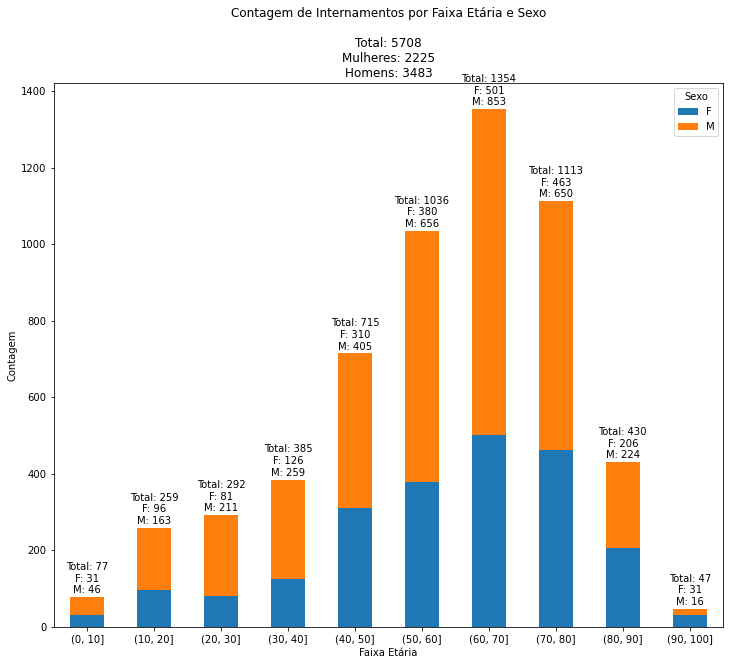

In [10]:
# Caracterização dos dados através do sexo e idade

# Definição de faixas etárias com intervalos de 10 anos (dos 0 anos aos 100 anos).
age_intervals = range(0, 110, 10)

# Categorização da sua faixa etária tendo por base a sua idade e as faixas etárias definidas
df_internamentos['Faixa Etária'] = pd.cut(df_internamentos['Idade'], age_intervals)

# Agrupar os dados por faixa etária e sexo
age_gender_groups = df_internamentos.groupby(['Faixa Etária', 'Sexo'])

# Contagem do número de individuos em cada faixa etária e por sexo
age_gender_counts = age_gender_groups.size().reset_index(name='Count')

# Tabela com separação de contagem por sexo
age_gender_counts_pivot = age_gender_counts.pivot(index='Faixa Etária', columns='Sexo', values='Count')

# Calculo do número de individuos por faixa etária
age_counts = age_gender_counts_pivot.sum(axis=1)

# Create a bar chart that shows the number of individuals and the number of females and males per age group.
ax = age_gender_counts_pivot.plot(kind='bar', stacked=True, figsize=(12, 10))

# Adição de legendas para cada coluna com o número exato de mulheres e homens em cada faixa etária
for i, row in enumerate(age_gender_counts_pivot.iterrows()):
    x = i
    y = sum(row[1])
    females = row[1]['F']
    males = row[1]['M']
    ax.text(x, y + 5, 'Total: {}\nF: {}\nM: {}'.format(y, females, males), ha='center', va='bottom')

ax.set_xlabel('Faixa Etária')
ax.set_ylabel('Contagem')
ax.set_title('Contagem de Internamentos por Faixa Etária e Sexo\n\nTotal: {}\nMulheres: {}\nHomens: {}'
             .format(age_counts.sum(), age_gender_counts_pivot['F'].sum(), age_gender_counts_pivot['M'].sum()))

plt.xticks(rotation=0)
plt.show()

In [11]:
# Substituição de todos os NaN na coluna 'Conc Residencia' por 'REGIÃO DESCONHECIDA'
df_internamentos['Conc Residencia'] = df_internamentos['Conc Residencia'].replace('nan', 'REGIÃO DESCONHECIDA')
unique_conc_residencia = df_internamentos['Conc Residencia'].unique()
unique_values = df_internamentos['Conc Residencia'].nunique()
print(unique_conc_residencia)
print(unique_values)

['SINTRA' 'CASCAIS' 'AMADORA' 'SETÚBAL' 'VILA FRANCA DE XIRA' 'PALMELA'
 'ALMADA' 'LISBOA' 'SANTIAGO DO CACÉM' 'BARREIRO' 'OEIRAS' 'MOITA'
 'SALVATERRA DE MAGOS' 'ALCOCHETE' 'TORRES NOVAS' 'ALMEIRIM' 'ABRANTES'
 'ALCOBAÇA' 'SÃO PEDRO DO SUL' 'PORTALEGRE' 'ÁGUEDA' 'LOURES' 'CORUCHE'
 'SANTARÉM' 'SANTAREM' 'ELVAS' 'SESIMBRA' 'ENTRONCAMENTO' 'VISEU'
 'REDONDO' 'TORRES VEDRAS' 'ALBERGARIA-A-VELHA' 'LOULÉ' 'ÉVORA'
 'PONTA DELGADA' 'BENAVENTE' 'MAFRA' 'LOURINHÃ' 'ODIVELAS' 'PORTO DE MÓS'
 'OURÉM' 'RIO MAIOR' 'LAGOA (ACORES)' 'FUNCHAL' 'SETUBAL' 'AZAMBUJA'
 'PONTE DE SOR' 'MAÇÃO' 'ALENQUER' 'SANTA CRUZ GRACIOSA'
 'ANGRA DO HEROISMO' 'SERPA' 'ALMODÔVAR' 'SEIXAL' 'ALCANENA'
 'CALDAS DA RAINHA' 'TOMAR' 'CALHETA (ACORES)' 'PORTIMÃO' 'BOMBARRAL'
 'CARTAXO' 'ALMEIDA' 'ARRUDA DOS VINHOS' 'PROENÇA-A-NOVA' 'TAVIRA'
 'MONTIJO' 'ODEMIRA' 'VILA REAL' 'CADAVAL' 'COIMBRA' 'GOLEGÃ' 'CRATO'
 'HORTA' 'VELAS' 'SOBRAL MONTE AGRAÇO' 'LAGOS' 'SABROSA' 'MONTEMOR-O-NOVO'
 'AVEIRO' 'SANTANA' 'MOURA' 'MATOSINHOS' 'CA

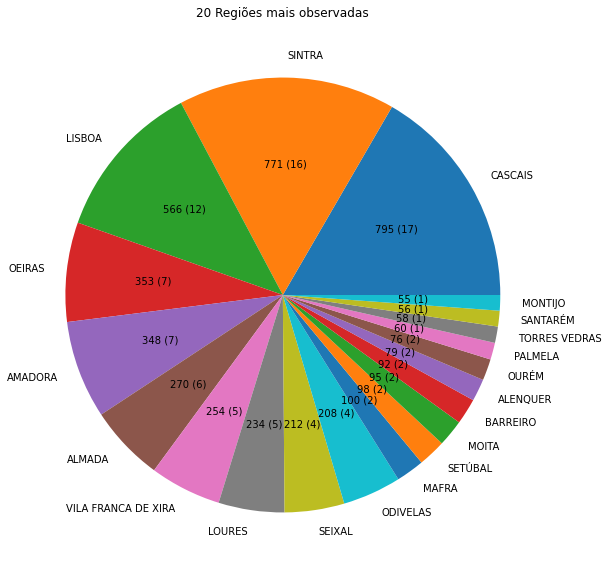

In [12]:
# Replace NaN values with 'REGIÃO DESCONHECIDA'
df_internamentos['Conc Residencia'] = df_internamentos['Conc Residencia'].fillna('REGIÃO DESCONHECIDA')

# Convert 'Conc Residencia' column to string type
df_internamentos['Conc Residencia'] = df_internamentos['Conc Residencia'].astype(str)

# Count the number of individuals for each unique 'Conc Residencia' value
region_counts = df_internamentos['Conc Residencia'].value_counts()

# Get the top 20 regions
top_regions = region_counts.head(20)

# Compute the total number of patients
total_patients = top_regions.sum()

# Compute the percentage of patients for each region
percentages = (top_regions / total_patients) * 100

# Create a pie chart with the top 20 regions
fig = plt.figure(figsize=(10, 10))
plt.pie(percentages, labels=top_regions.index, autopct=lambda count: f'{count / 100 * total_patients:.0f} ({count:.0f})')
plt.title('20 Regiões mais observadas')
plt.show()


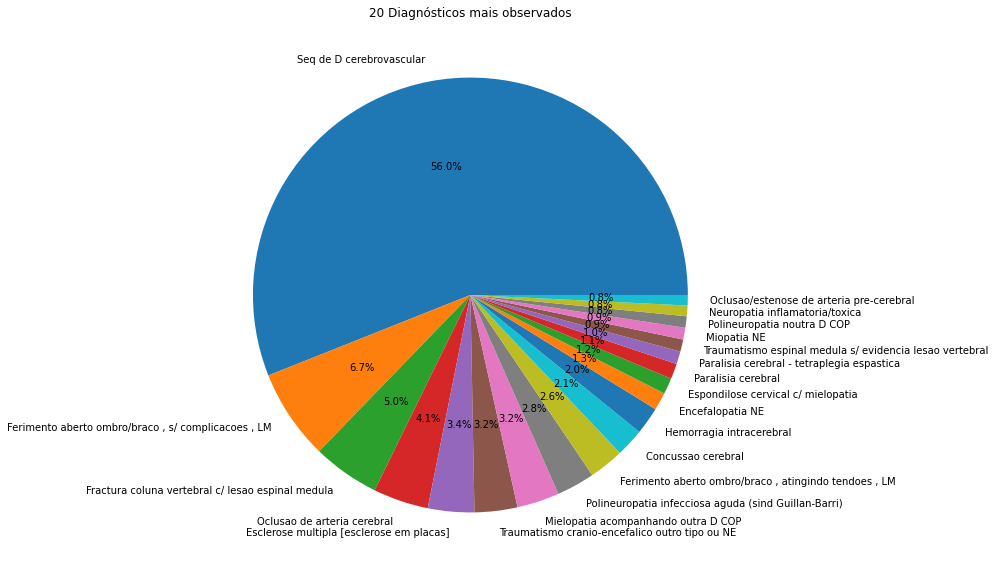

In [13]:
# Get the counts for each unique value in 'Diagnostico'
diag_counts = df_internamentos['Diagnostico'].value_counts()

# Get the top 20 values
top20 = diag_counts.head(20)

# Plot the top 20 values as a pie chart
plt.figure(figsize=(10,10))
plt.pie(top20.values, labels=top20.index, autopct='%1.1f%%')
plt.title('20 Diagnósticos mais observados')
plt.show()

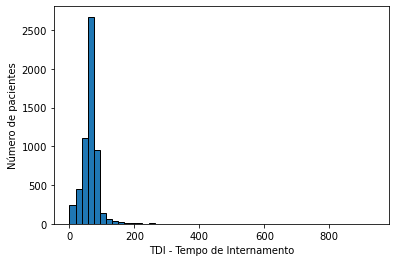

In [14]:
plt.hist(df_internamentos['TDI'], bins=50, edgecolor='black')
plt.xlabel('TDI - Tempo de Internamento')
plt.ylabel('Número de pacientes')
plt.show()

In [15]:
# Matriz de correlação executada no ficheio de internamentos
corr_matrix = round(df_internamentos.corr(),2)
print(corr_matrix)

          Idade   TDI  TDIFP  DINP  Cod_Diag  EFR_Cod
Idade      1.00 -0.05  -0.05 -0.05     -0.11    -0.06
TDI       -0.05  1.00   1.00  0.96      0.06    -0.05
TDIFP     -0.05  1.00   1.00  0.96      0.06    -0.05
DINP      -0.05  0.96   0.96  1.00      0.05    -0.04
Cod_Diag  -0.11  0.06   0.06  0.05      1.00    -0.07
EFR_Cod   -0.06 -0.05  -0.05 -0.04     -0.07     1.00


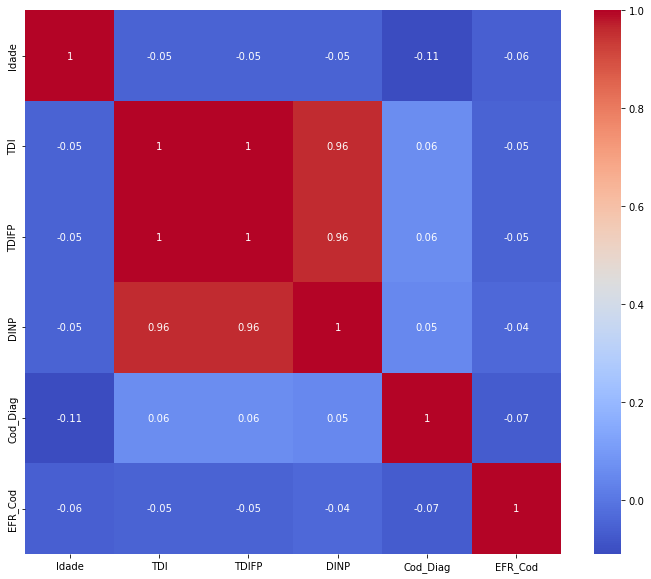

In [16]:
# Visualização dessa matriz
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()